In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [2]:
points = []

def initializePoints(count):
    for i in range(int(count/3)):
         points.append([random.gauss(0,10),random.gauss(100,10)])
    for i in range(int(count/3)):
         points.append([random.gauss(-30,20),random.gauss(10,10)])
    for i in range(int(count/3)):
         points.append([random.gauss(30,20),random.gauss(10,10)])

    return points


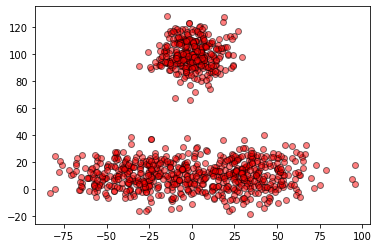

In [3]:
#plotting the points
points = initializePoints(1000)
a = [x[0] for x in points]
b = [x[1] for x in points]
plt.scatter(a, b,color='red',alpha=0.5,edgecolor='black')
plt.show()

In [4]:
def cluster(points,K,visuals = True):
    #clusters=[]
    
    a = [i[0] for i in points]
    b = [j[1] for j in points]
    
    #we are randomly placing centroid of the clusters
    centroid=[[random.randint(-30,20),random.randint(10,100)]for i in range(K)]    
    
    #we are now creating a dataframe which has columns x, y and closest 
    bound=pd.DataFrame({'x':a,'y':b,'closest':None})
    
    
    # Continues until all categories stop changing 
    while True:
        close=bound['closest'].copy(deep=True)
        
        sp = 0 
        ep = 1
        
        
        ## Finding the eucledian distance between points and centroid
        lc = len(centroid)
        ls = 0
        while ls < lc:
            bound['centroid{}'.format(ls)] = (((bound['x'] - centroid[ls][0]) ** 2+(bound['y'] - centroid[ls][1]) ** 2)**0.5)
            ls = ls + 1
            
        
        #Extracting centroid labels 
        centroidLabels=[c for c in bound if c.startswith('centroid')]
       

        
        color=bound.loc[:,centroidLabels].idxmin(axis=1)   
        mini=bound.loc[:,centroidLabels].idxmin(axis=1)
         

        lm = len(mini)
        ls = 0
        while ls < lm:
            mini[ls]=int(mini[ls].strip('centroid'))
            color[ls]=d[mini[ls]]
            ls = ls + 1
            
            

        bound['closest']=mini
        bound['color']=color
        
        ## Find mean of all points within a cluster and make it as the centroid
        lc = len(centroid)
        ls = 0

        # Updating the centroid
        while ls < lc:
            centroid[ls][sp]=np.mean(bound[bound['closest']==ls]['x'])
            centroid[ls][ep]=np.mean(bound[bound['closest']==ls]['y'])
            ls = ls + 1
            
 
            
        
        #Breaks when the category stops changing
        if close.equals(bound['closest']):
            break
        
        #for plotting figures
        fig=plt.figure(figsize=(5,5))
        plt.scatter(bound['x'],bound['y'],color=bound['color'],alpha=0.5,edgecolor='w')
        
        lc = len(centroid)
        ls = 0
        
        while ls < lc:
          plt.scatter(centroid[ls][sp],centroid[ls][ep],color=d[ls],edgecolor='k')
          ls = ls + 1
            
        
        plt.ylim(-100,150)
        plt.xlim(-100,100)
        plt.show()
        #returning the standard deviation of the values
        cluster = np.std(bound['closest'])
        return cluster

In [5]:
def clusterQuality(clusters):
    score = 100000000000
    #The cluster with minimum standard deviation, will give the best score for k-means
    count = 0
    for i in clusters:
        if i < score:
            score = i
            alpha = count
        count = count + 1
    print("We get the best cluster in the iteration number: ",alpha)
    
    return score

In [6]:
def keepClustering(points,K,N,visuals):
    clusters = []
    for i in range(N):
        print("Iteration Number: ",i)
        temp = cluster(points,K,visuals = True)
        clusters.append(temp)
    #print(clusters)
    
    return clusters
    

Iteration Number:  0


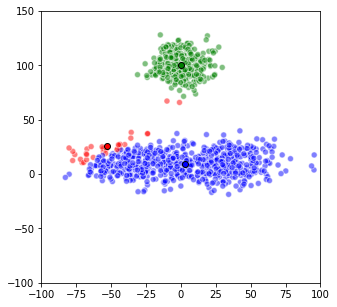

Iteration Number:  1


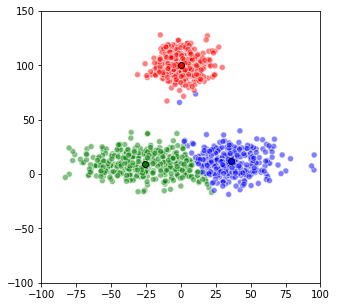

Iteration Number:  2


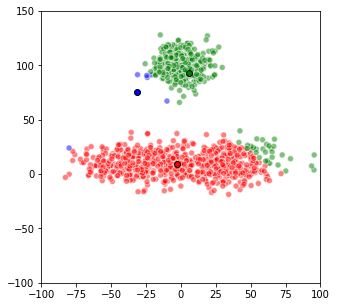

Iteration Number:  3


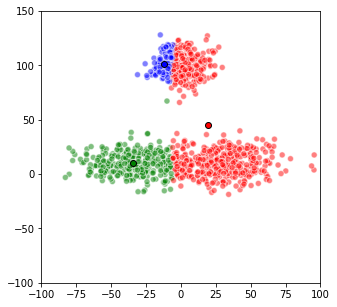

Iteration Number:  4


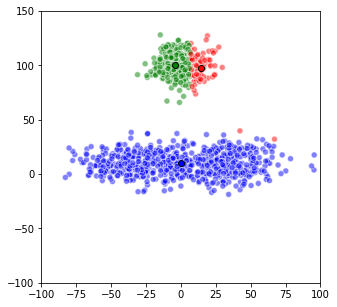

Iteration Number:  5


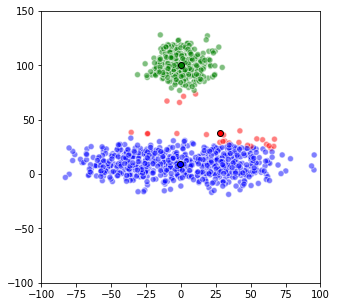

Iteration Number:  6


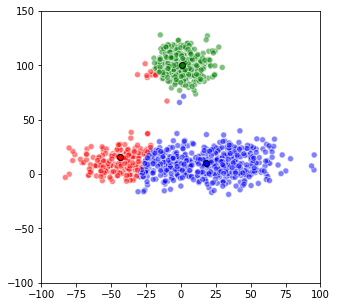

Iteration Number:  7


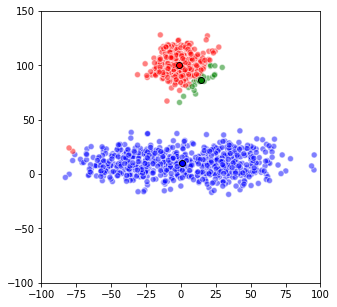

Iteration Number:  8


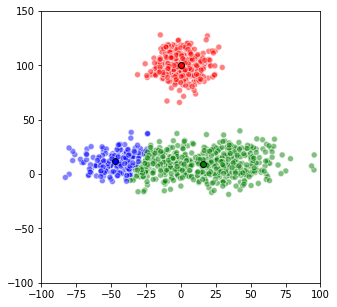

Iteration Number:  9


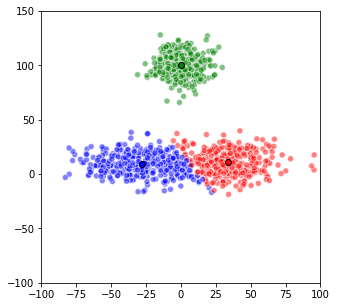

We get the best cluster in the iteration number:  2
The score of best Kmeans clustering is: 0.4959613991443013


In [7]:
K = 3
N = 10
d ={0:'r',1:'g',2:'b'}
#points = initializePoints(1000)


clusters = keepClustering(points,K,N,True)

print ("The score of best Kmeans clustering is:", clusterQuality(clusters))
